<a href="https://colab.research.google.com/github/naidu199/FML_lab/blob/main/Naive_bayes_classifier_FML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
data=pd.read_excel('/content/drive/MyDrive/FML_DATA_SETS/Social_Network_Ads.xlsx')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [29]:
X=data.iloc[:,2:4].values
Y=data.iloc[:,-1].values

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.22,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain,ytrain)

GaussianNB()

In [33]:
ypred=classifier.predict(xtest)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.97      0.85      0.90        33

    accuracy                           0.93        88
   macro avg       0.94      0.92      0.93        88
weighted avg       0.93      0.93      0.93        88



<Axes: >

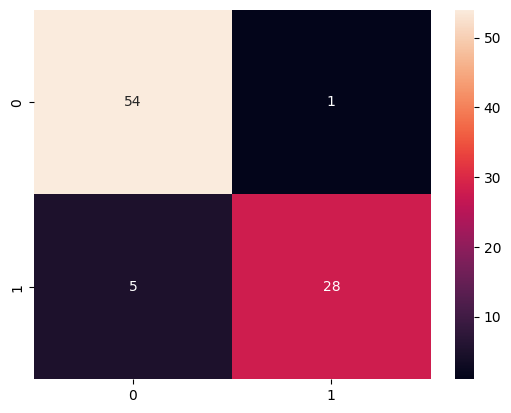

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [36]:
# !pip install mlxtend

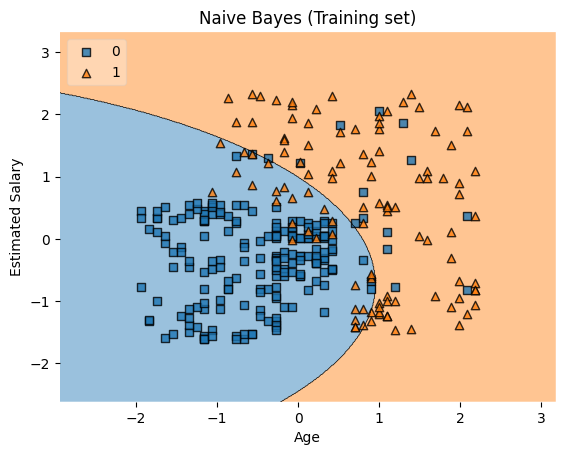

In [39]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=xtrain, y=ytrain, clf=classifier, legend=2)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()


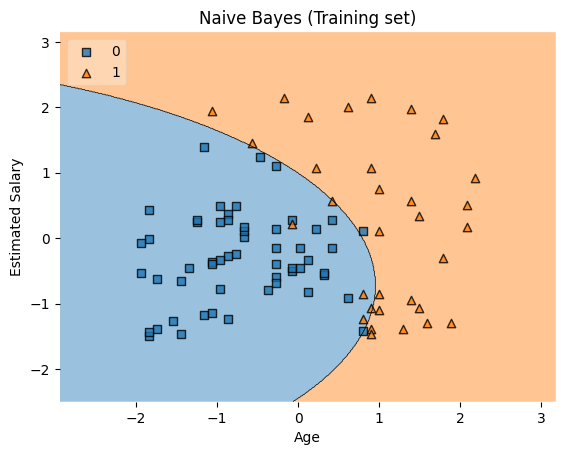

In [40]:
plot_decision_regions(X=xtest, y=ytest, clf=classifier, legend=2)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()
